# test 2 cameras
* Model A02 : 1 camera connector
* Model B01 : 2 camera connectors
* USB camera is not implemented yet

In [1]:
import sys, time, subprocess
sys.path.append('../')
from utils.camera import Camera
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# check cameras
# !ls /dev/video*
connected_cameras = subprocess.check_output('ls /dev/video*', shell=True).decode('utf8').split('\n')
print(connected_cameras)

['/dev/video0', '/dev/video1', '']


In [3]:
# set the connected cameras
# my jetson has 2 cameras and the jetbot only one
# flip_mode depends on how the cam is mounted. In this script are my settings

user_id = subprocess.check_output('id -u -n', shell=True).decode('utf8').replace('\n','')
print(f'user_id = "{user_id}"')

if user_id == 'jetbot':
    print('configure 1 intercal cam')
    is_internal_camera0 = True
    is_internal_camera1 = False
    flip_mode = 1
elif user_id == 'jetson':
    print('configure 2 intercal cams')
    is_internal_camera0 = True
    is_internal_camera1 = True
    flip_mode = -1
else:
    print('unknown')
    


user_id = "jetson"
configure 2 intercal cams


In [4]:
# set only if connected
# e.g.'/dev/video2' or None if not connected
usb_camera = None 

In [5]:
if is_internal_camera0:
    print('\ninitialize internal camera 0')
    camera0 = Camera(capture_device=0, width=224, height=224, 
                     capture_width=1280, capture_height=720, capture_fps=30, flip_mode=flip_mode, debug=True)
if is_internal_camera1:
    print('\ninitialize internal camera 1')
    camera1 = Camera(capture_device=1, width=224, height=224, 
                     capture_width=1280, capture_height=720, capture_fps=30, flip_mode=flip_mode, debug=True)
if usb_camera is not None:
    print('\ninitialize usb camera', usb_camera)
    camera2 = Camera(capture_device=int(usb_camera[-1]), width=224, height=224, 
                     capture_width=2304, capture_height=1536, capture_fps=2, flip_mode=1, debug=True, 
                     is_internal_camera=False)


initialize internal camera 0
nvarguscamerasrc sensor-id=0 ! video/x-raw(memory:NVMM), width=1280, height=720,                     format=(string)NV12, framerate=(fraction)30/1 ! nvvidconv ! video/x-raw, width=(int)224,                     height=(int)224, format=(string)BGRx ! videoconvert ! appsink drop=true sync=false

initialize internal camera 1
nvarguscamerasrc sensor-id=1 ! video/x-raw(memory:NVMM), width=1280, height=720,                     format=(string)NV12, framerate=(fraction)30/1 ! nvvidconv ! video/x-raw, width=(int)224,                     height=(int)224, format=(string)BGRx ! videoconvert ! appsink drop=true sync=false


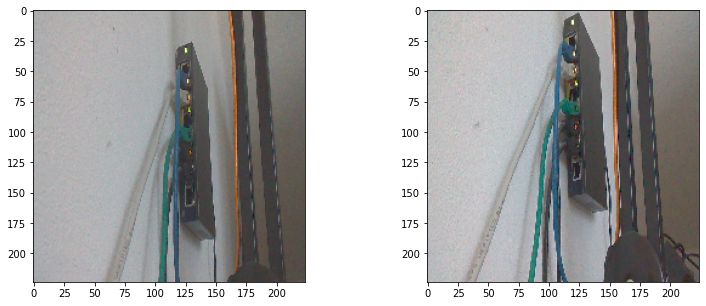

In [7]:
fig = plt.figure(figsize=(20,5))

if is_internal_camera0:
    fig.add_subplot(1, 3, 1)
    img0 = camera0.get_image_rgb()
    plt.imshow(img0)
if is_internal_camera1:
    img1 = camera1.get_image_rgb()
    fig.add_subplot(1, 3, 2)
    plt.imshow(img1);
if usb_camera is not None:
    img3 = camera2.get_image_rgb()
    fig.add_subplot(1, 3, 3)
    plt.imshow(img3);


# live video with widgets

In [28]:
from IPython.display import display
import ipywidgets.widgets as widgets
import cv2
image_widget0 = widgets.Image(format='jpeg', width=224, height=224)
image_widget1 = widgets.Image(format='jpeg', width=224, height=224)
counter_widget = widgets.IntText(value=0, description='counter')
fps_widget = widgets.IntText(value=0, description='fps')

display(widgets.HBox([image_widget0, image_widget1, widgets.VBox([counter_widget, fps_widget]) ]))

In [37]:
t_old = time.time()
for i in range (300):
    image_widget0.value= bytes(cv2.imencode('.jpg', camera0.get_image_rgb())[1])
    image_widget1.value= bytes(cv2.imencode('.jpg', camera1.get_image_rgb())[1])
    counter_widget.value = i +1
    t_new = time.time()
    fps_widget.value = (1 / (t_new - t_old))
    t_old = t_new    